In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.time_series import stationarity_tester
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

In [16]:
stasiun_1_intrp = pd.read_csv('C:\\Users\\fayme amelia celesta\\Documents\\VScode\\Python\\Explore\\Time Series\\SARIMA\\stasiun_1_intrp.csv')

In [17]:
stasiun_1_intrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1827 non-null   object 
 1   Tavg        1827 non-null   float64
 2   RH_avg      1827 non-null   float64
 3   RR          1827 non-null   float64
 4   ss          1827 non-null   float64
 5   ddd_x       1827 non-null   float64
 6   ff_avg      1827 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


In [18]:
stasiun_1_intrp.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [19]:
# df['date'] = pd.to_datetime(df['date'])
stasiun_1_intrp['date'] = pd.to_datetime(stasiun_1_intrp['date'])
stasiun_1_intrp.set_index('date', inplace=True)

In [20]:
num_cols = ['Tavg', 'RH_avg', 'RR', 'ss', 'ddd_x', 'ff_avg']

In [21]:
stasiun_1_intrp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2016-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tavg    1827 non-null   float64
 1   RH_avg  1827 non-null   float64
 2   RR      1827 non-null   float64
 3   ss      1827 non-null   float64
 4   ddd_x   1827 non-null   float64
 5   ff_avg  1827 non-null   float64
dtypes: float64(6)
memory usage: 99.9 KB


In [22]:
stasiun_1_intrp

,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
date,,,,,,
2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0
...,...,...,...,...,...,...
2020-12-27,29.0,74.0,0.000000,5.7,240.0,2.0
2020-12-28,28.1,77.0,0.050000,6.8,240.0,3.0
2020-12-29,27.1,82.0,0.100000,6.1,240.0,3.0


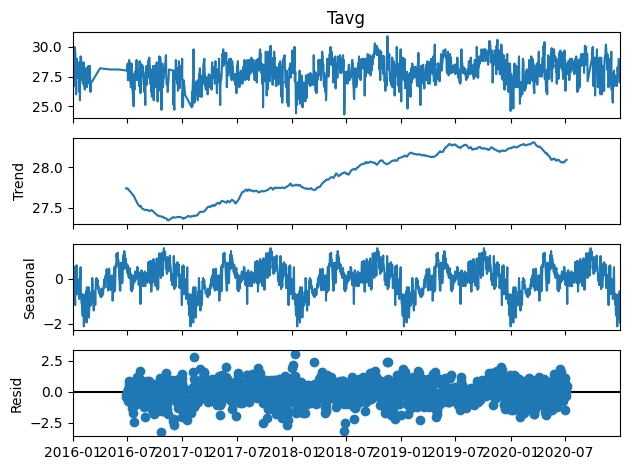

In [23]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['Tavg'] ,period = 356,model = 'additive').plot()
plt.show()

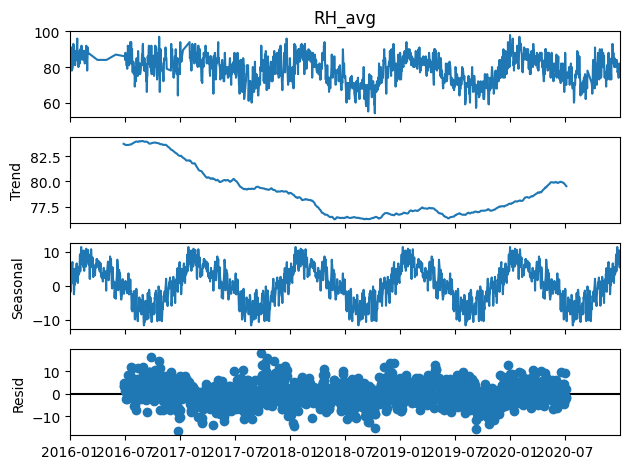

In [24]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['RH_avg'] ,period = 356,model = 'additive').plot()
plt.show()

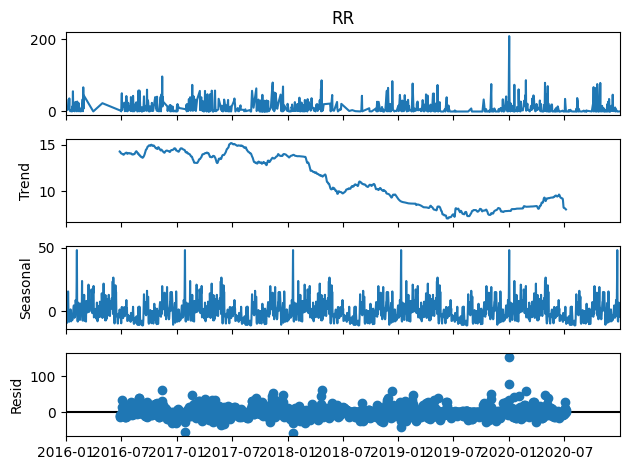

In [25]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['RR'],model = 'additive', period=356).plot()
plt.show()

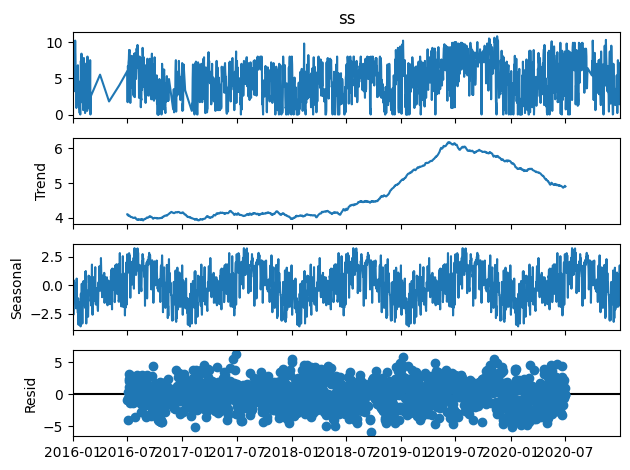

In [26]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['ss'] ,period = 365,model = 'additive').plot()
plt.show()

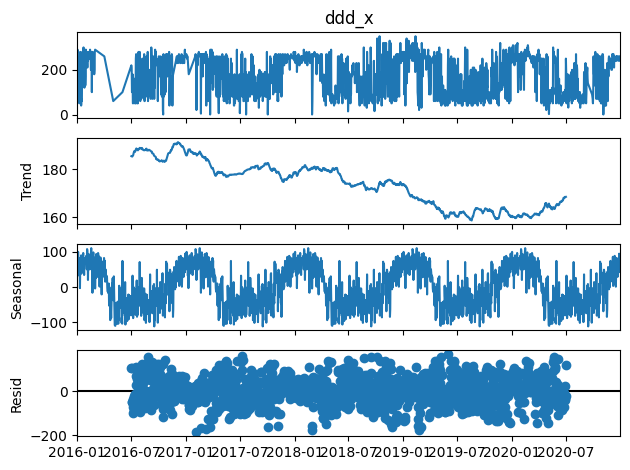

In [27]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['ddd_x'] ,period = 365,model = 'additive').plot()
plt.show()

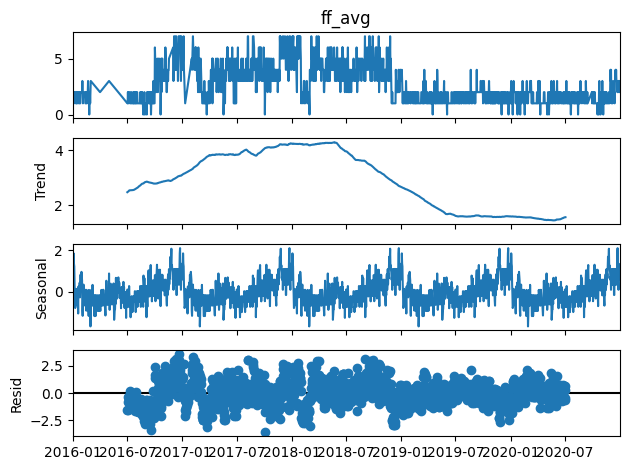

In [28]:
dec = sm.tsa.seasonal_decompose(stasiun_1_intrp['ff_avg'] ,period = 365,model = 'additive').plot()
plt.show()

In [29]:
stationarity_tester(stasiun_1_intrp['Tavg'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-4.746984,0.000069,-3.433976,-2.863142,-2.567623,True
KPSS,1.260038,0.01,0.739,0.463,0.347,True


In [30]:
stationarity_tester(stasiun_1_intrp['RH_avg'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-3.214387,0.019167,-3.433976,-2.863142,-2.567623,True
KPSS,1.155546,0.01,0.739,0.463,0.347,True


In [31]:
stationarity_tester(stasiun_1_intrp['RR'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.511172,0.0,-3.43397,-2.863139,-2.567621,True
KPSS,1.417163,0.01,0.739,0.463,0.347,True


In [32]:
stationarity_tester(stasiun_1_intrp['ddd_x'])

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-5.035826,0.000019,-3.433958,-2.863134,-2.567618,True
KPSS,0.312818,0.1,0.739,0.463,0.347,False


In [33]:
stationarity_tester(stasiun_1_intrp['ff_avg'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-4.1721,0.000734,-3.433954,-2.863132,-2.567618,True
KPSS,1.998164,0.01,0.739,0.463,0.347,True


In [34]:
stationarity_tester(stasiun_1_intrp['ss'])

ADF:        Series is stationary
KPSS:       Series is non-stationary
Conclusion: Series may be difference stationary. Try using differencing.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-4.006327,0.001378,-3.433982,-2.863144,-2.567624,True
KPSS,1.577026,0.01,0.739,0.463,0.347,True


In [35]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

Menerapkan orde differencing pada kolom Tavg untuk menghilangkan trend

In [36]:
diff_data_T = stasiun_1_intrp['Tavg'].diff()
diff_data_T.dropna(inplace=True)

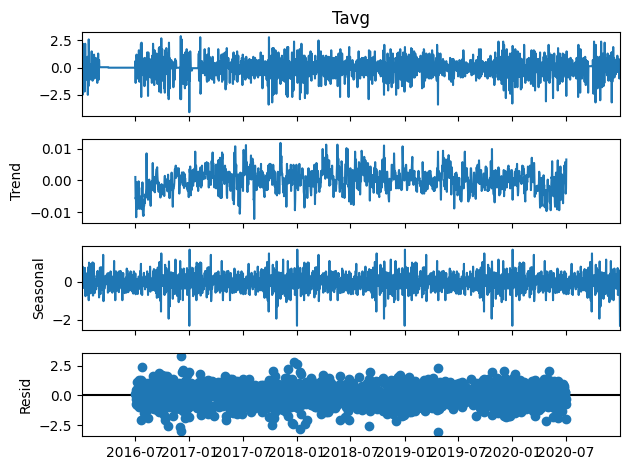

In [37]:
dec = sm.tsa.seasonal_decompose(diff_data_T ,period = 365,model = 'additive').plot()
plt.show()

In [38]:
stationarity_tester(diff_data_T)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-14.858039,0.0,-3.433978,-2.863143,-2.567623,True
KPSS,0.20271,0.1,0.739,0.463,0.347,False


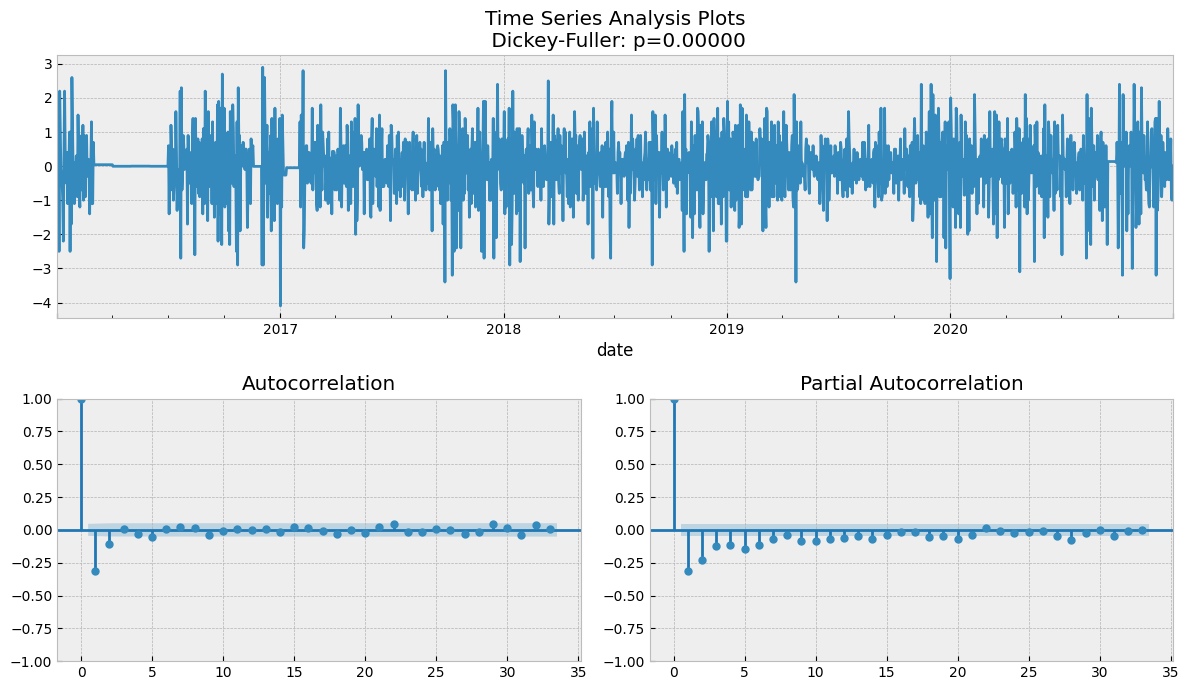

In [39]:
tsplot(diff_data_T)

parameter (p,d,q) Tavg = (1,1,1)

Menerapkan orde differencing pada kolom ss untuk menghilangkan trend

In [40]:
diff_data_ss = stasiun_1_intrp['ss'].diff()
diff_data_ss.dropna(inplace=True)

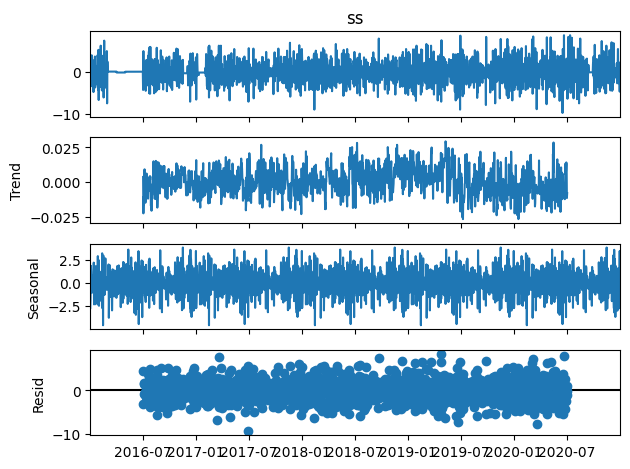

In [41]:
dec = sm.tsa.seasonal_decompose(diff_data_ss ,period = 365,model = 'additive').plot()
plt.show()

In [42]:
stationarity_tester(diff_data_ss)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-14.54721,0.0,-3.433988,-2.863147,-2.567626,True
KPSS,0.060964,0.1,0.739,0.463,0.347,False


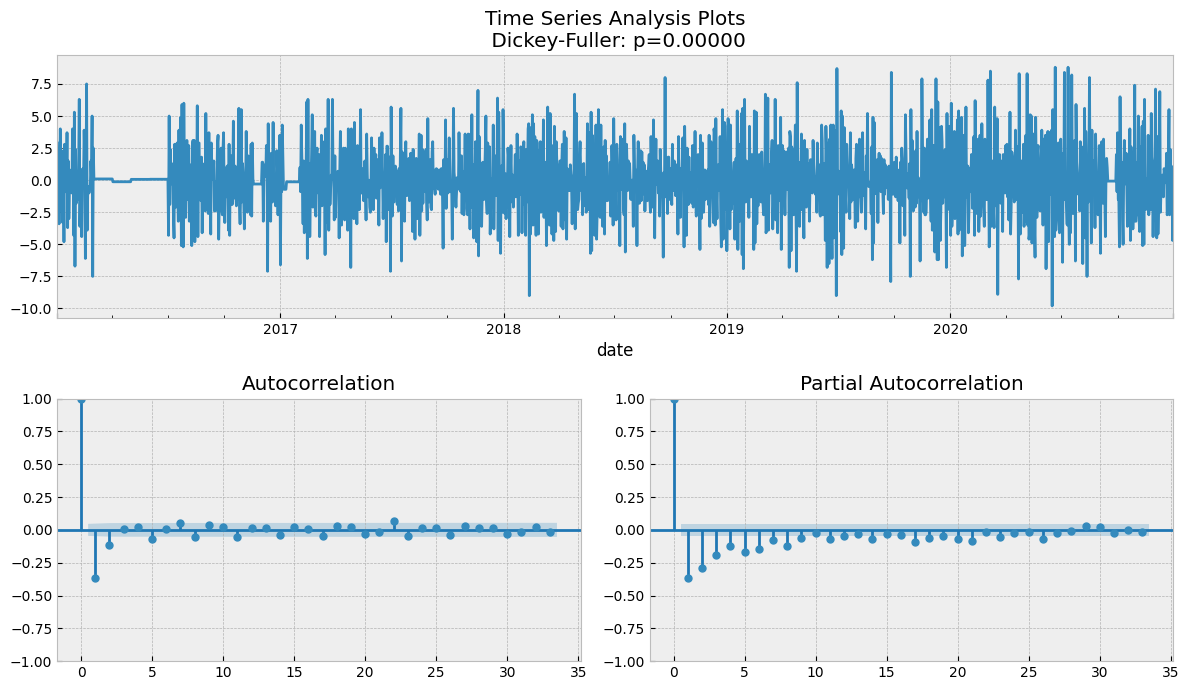

In [43]:
tsplot(diff_data_ss)

parameter (p,d,q) kolom ss = (2,1,1)

In [44]:
diff_data_rh = stasiun_1_intrp['RH_avg'].diff()
diff_data_rh.dropna(inplace=True)

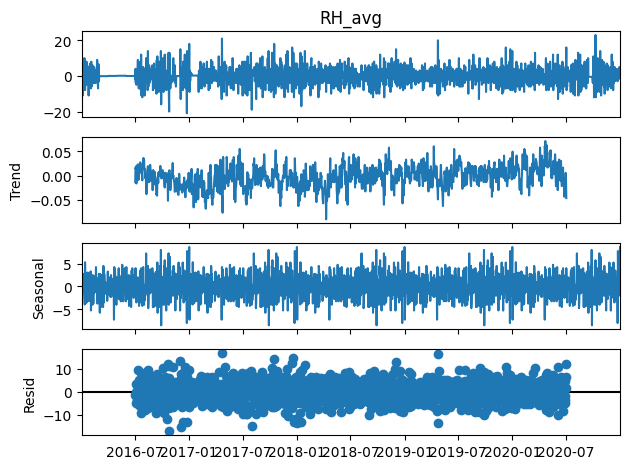

In [45]:
dec = sm.tsa.seasonal_decompose(diff_data_rh ,period = 365,model = 'additive').plot()
plt.show()

In [46]:
stationarity_tester(diff_data_rh)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-15.484604,0.0,-3.433976,-2.863142,-2.567623,True
KPSS,0.044261,0.1,0.739,0.463,0.347,False


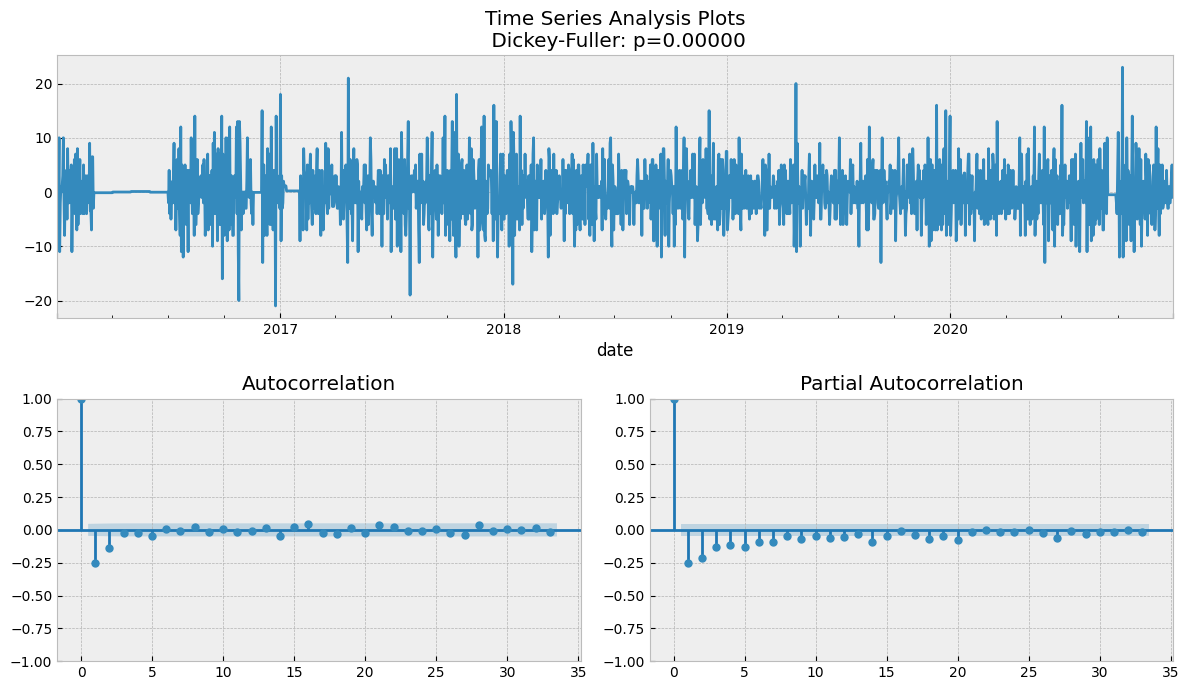

In [47]:
tsplot(diff_data_rh)

parameter (p,d,q) kolom rh = (1,1,1)

In [48]:
diff_data_rr = stasiun_1_intrp['RR'].diff(2)
diff_data_rr.dropna(inplace=True)

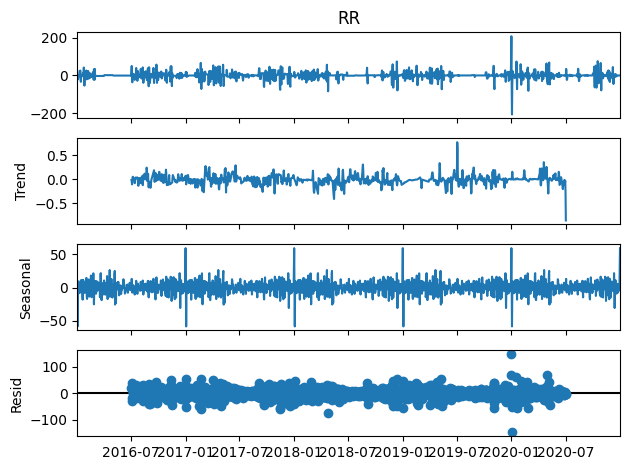

In [49]:
dec = sm.tsa.seasonal_decompose(diff_data_rr ,period = 365,model = 'additive').plot()
plt.show()

In [50]:
stationarity_tester(diff_data_rr)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-12.560453,0.0,-3.43399,-2.863148,-2.567626,True
KPSS,0.142614,0.1,0.739,0.463,0.347,False


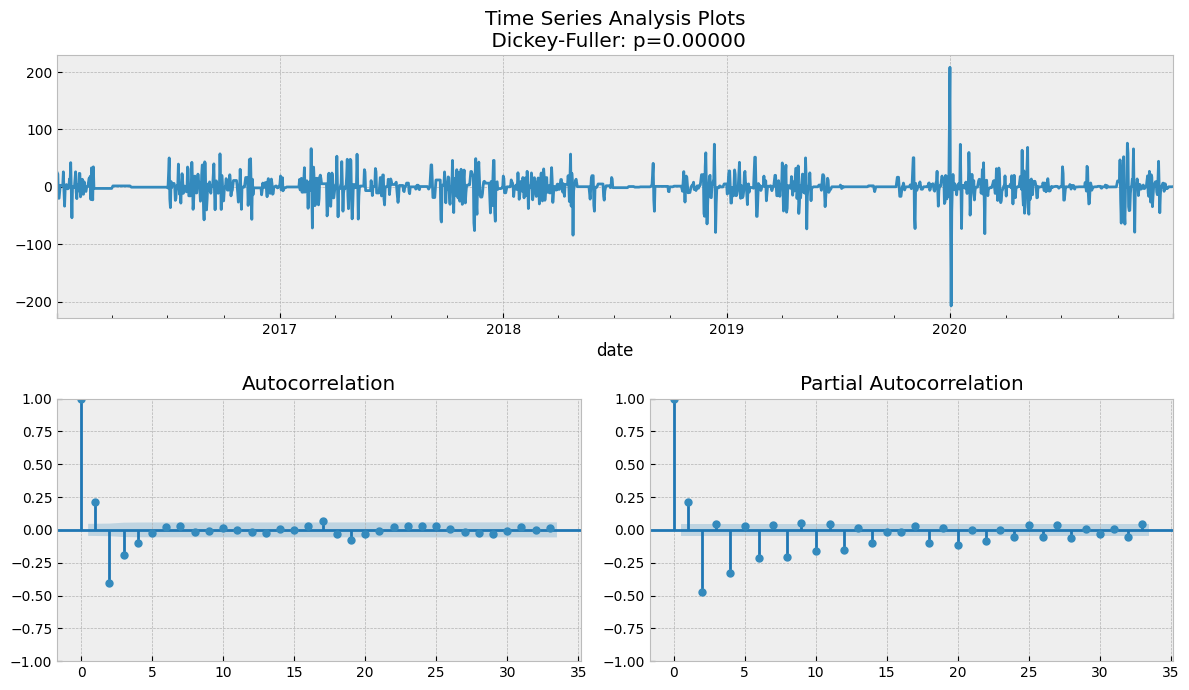

In [51]:
tsplot(diff_data_rr)

parameter (p,d,q) kolom RR = (2,(0,1,2),1)

In [52]:
diff_data_ff = stasiun_1_intrp['ff_avg'].diff()
diff_data_ff.dropna(inplace=True)

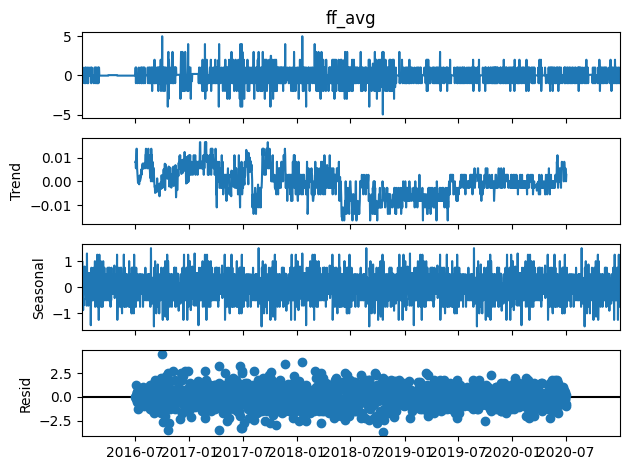

In [53]:
dec = sm.tsa.seasonal_decompose(diff_data_ff ,period = 365,model = 'additive').plot()
plt.show()

In [54]:
stationarity_tester(diff_data_ff)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-16.534532,0.0,-3.433962,-2.863136,-2.567619,True
KPSS,0.050671,0.1,0.739,0.463,0.347,False


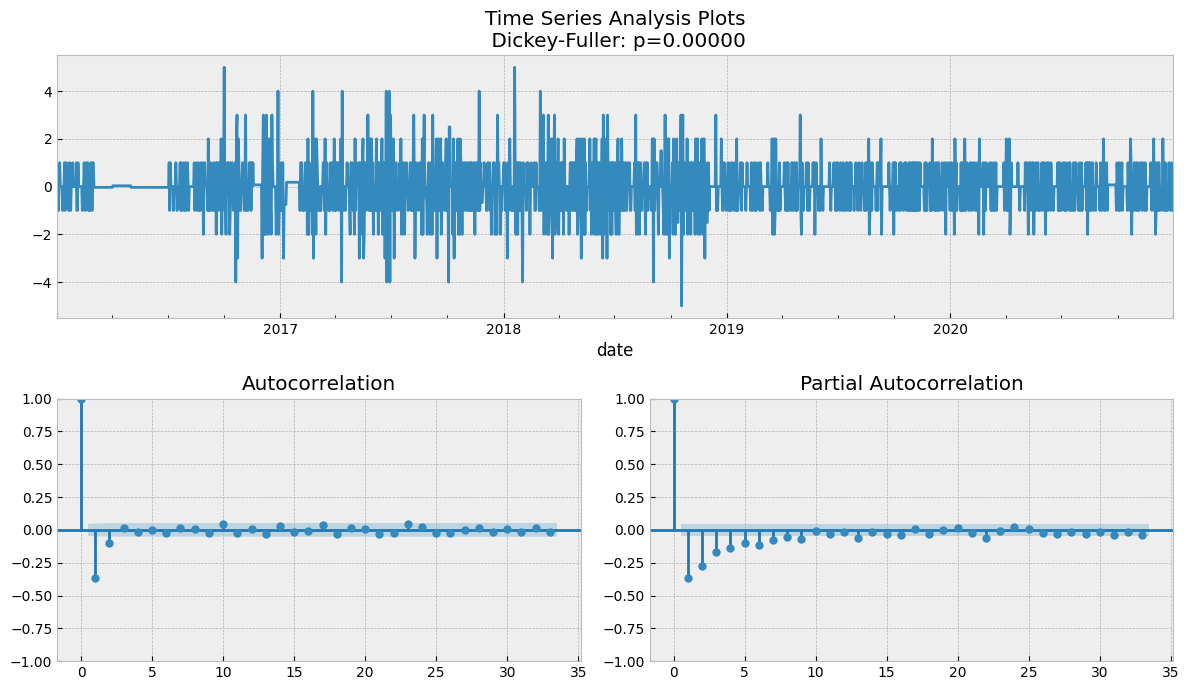

In [55]:
tsplot(diff_data_ff)

parameter (p,d,q) kolom ff = (2,(0,1),1)

In [56]:
diff_data_ddd = stasiun_1_intrp['ddd_x'].diff()
diff_data_ddd.dropna(inplace=True)

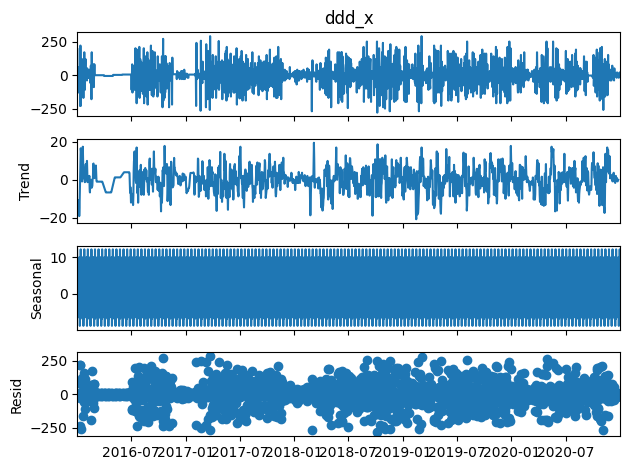

In [57]:
dec = sm.tsa.seasonal_decompose(diff_data_ddd ,period = 12,model = 'additive').plot()
plt.show()

In [58]:
stationarity_tester(stasiun_1_intrp['ddd_x'])

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-5.035826,0.000019,-3.433958,-2.863134,-2.567618,True
KPSS,0.312818,0.1,0.739,0.463,0.347,False


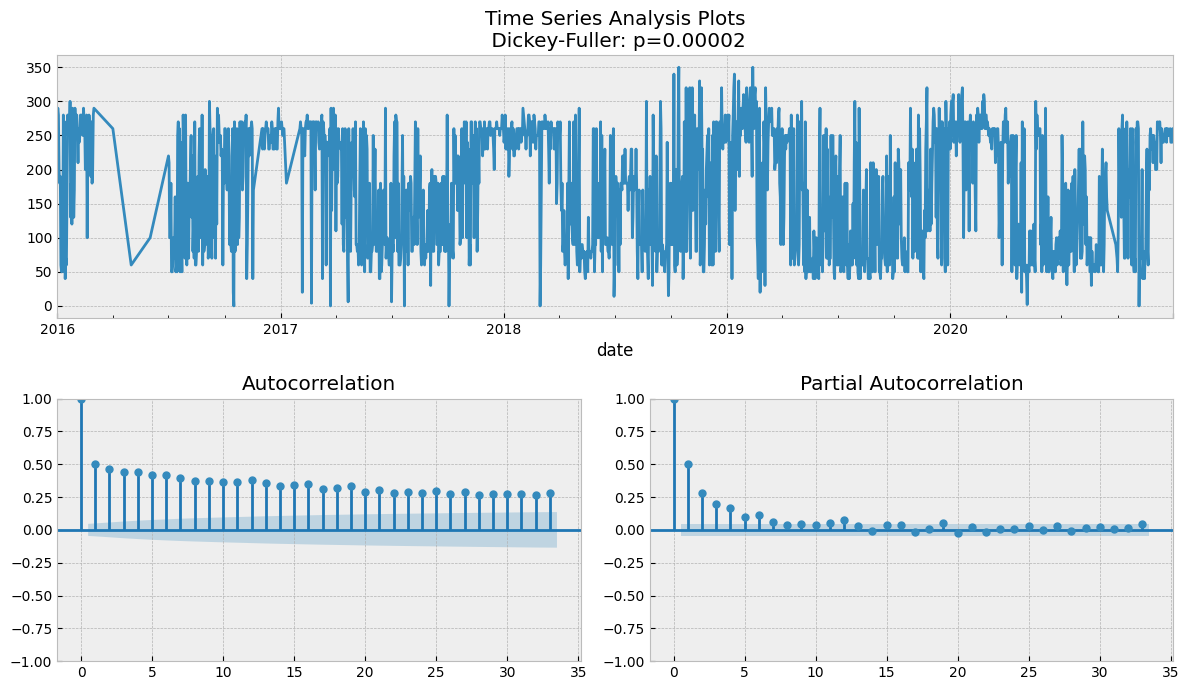

In [59]:
tsplot(stasiun_1_intrp['ddd_x'])

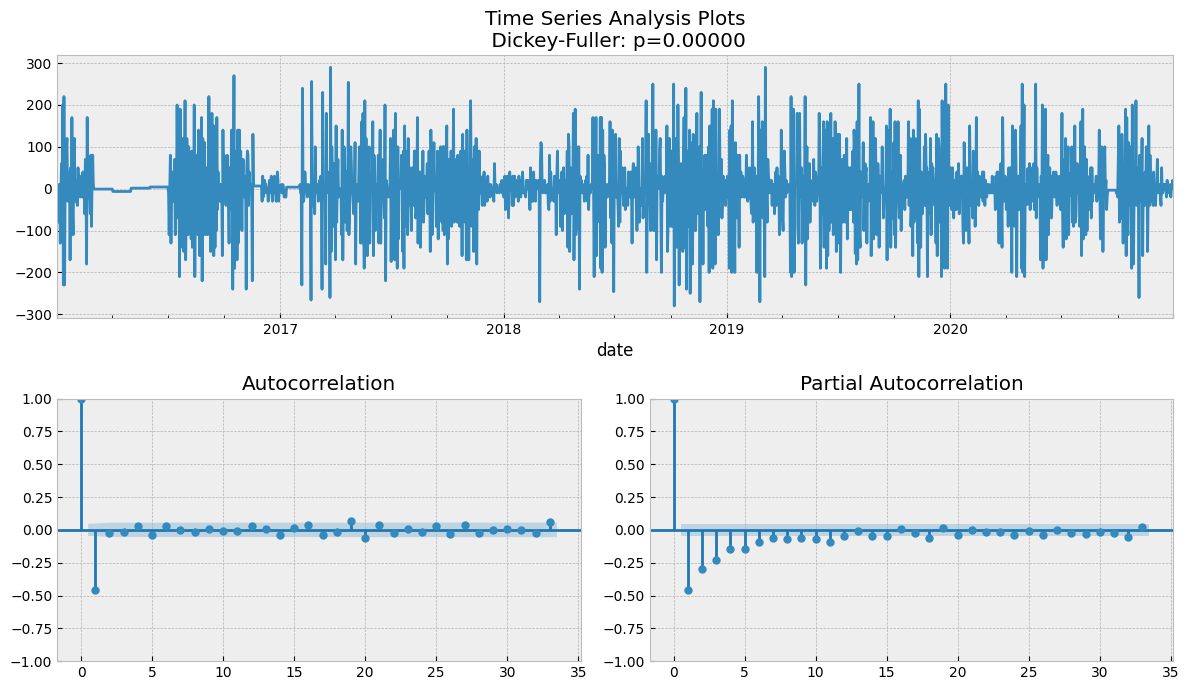

In [60]:
tsplot(diff_data_ddd)

parameter (p,d,q) kolom ddd = (2,1,1)

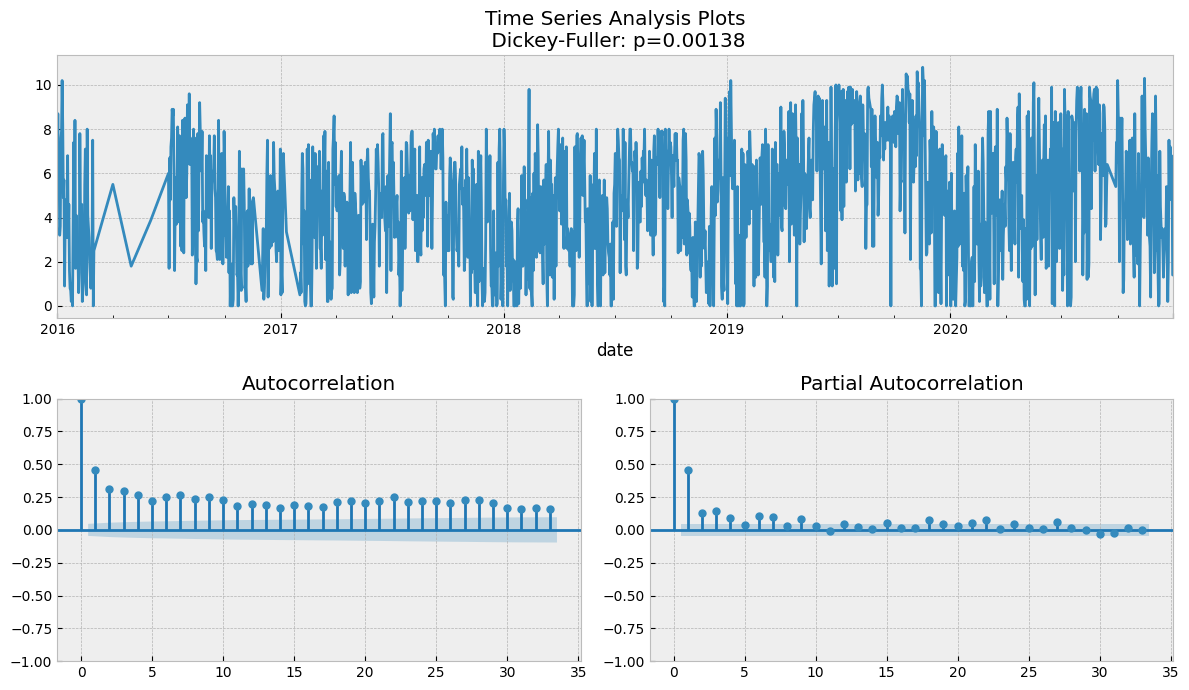

In [61]:
tsplot(stasiun_1_intrp['ss'])